In [1]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import clear_output


os.makedirs('./plots', exist_ok=True)
G_VALUES = ["0", "1", "4", "H"]
sns.set()

# Przebiegi dla genotypów

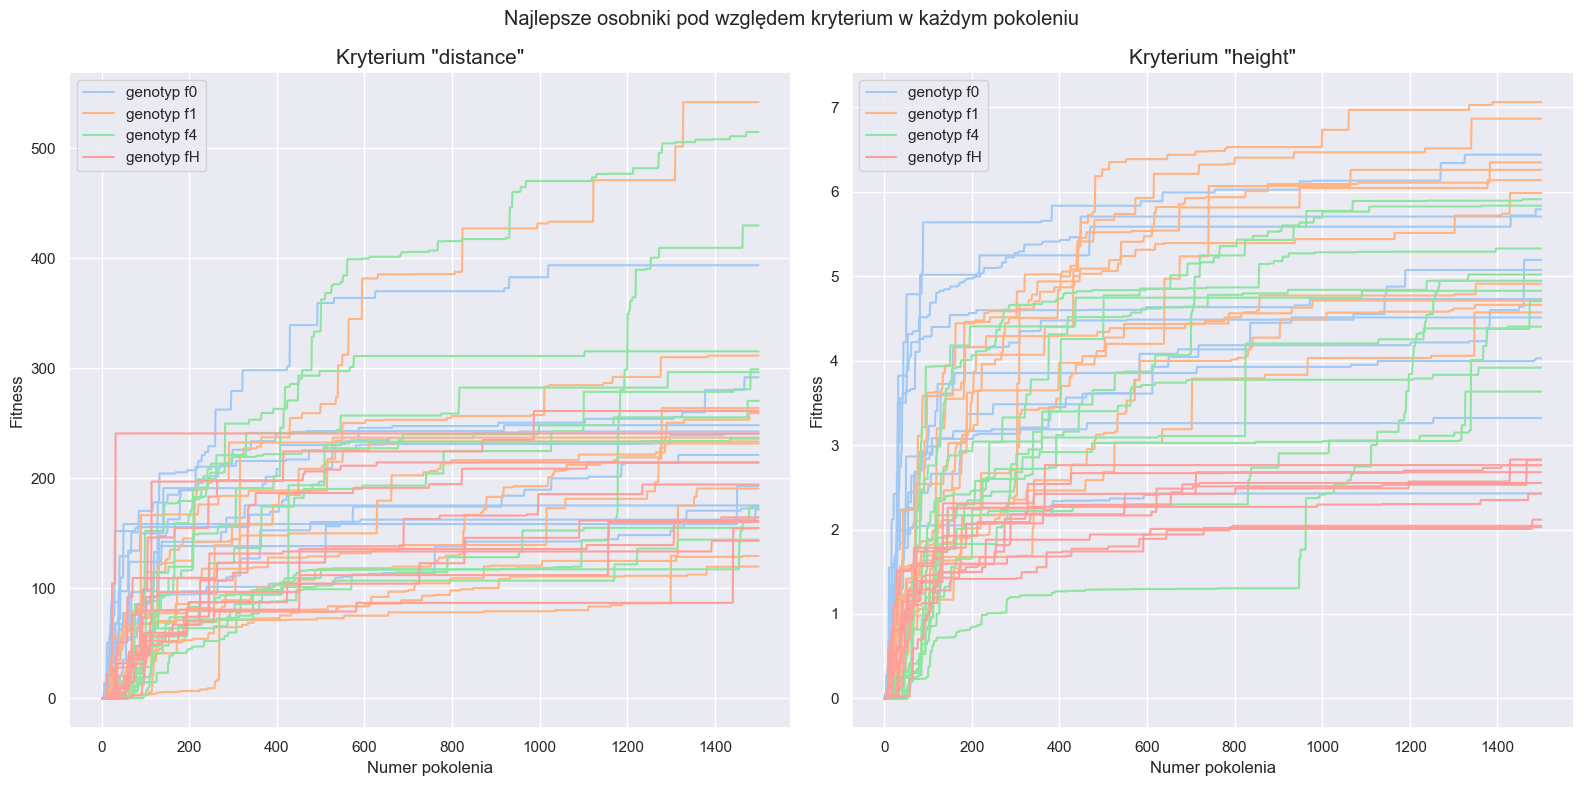

In [41]:
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette)) 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes = axes.flatten()

base_path = Path("../framspy/lab7")

# DISTANCE
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        data = {"distance": []}
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_distance = 0
                for line in file:
                    if line.startswith("0:"):
                        best_distance = max(best_distance, float(line.split(':')[1]))
                data["distance"].append(best_distance)     

        df = pd.DataFrame(data)
        sns.lineplot(
            df,
            x=range(1, len(df)+1),
            y="distance",
            color=color_map[g_value],
            label=f"genotyp f{g_value}" if iteration_path.name == "1" else "",
            ax=axes[0]
        )
axes[0].set_title("Kryterium \"distance\"", fontsize=15)
axes[0].set_ylabel("Fitness")
axes[0].set_xlabel("Numer pokolenia")

# HEIGHT
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        data = {"height": []}
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_height = 0
                for line in file:
                    if line.startswith("1:"):
                        best_height = max(best_height, float(line.split(':')[1]))
                data["height"].append(best_height)     

        df = pd.DataFrame(data)
        sns.lineplot(
            df,
            x=range(1, len(df)+1),
            y="height",
            color=color_map[g_value],
            label=f"genotyp f{g_value}" if iteration_path.name == "1" else "",
            ax=axes[1]
        )

axes[1].set_title("Kryterium \"height\"", fontsize=15)
axes[1].set_ylabel("Fitness")
axes[1].set_xlabel("Numer pokolenia")

plt.suptitle("Najlepsze osobniki pod względem kryterium w każdym pokoleniu")
plt.tight_layout()
plt.savefig('plots/1-przebiegi.png')
plt.show()

# Przebiegi zagregowane

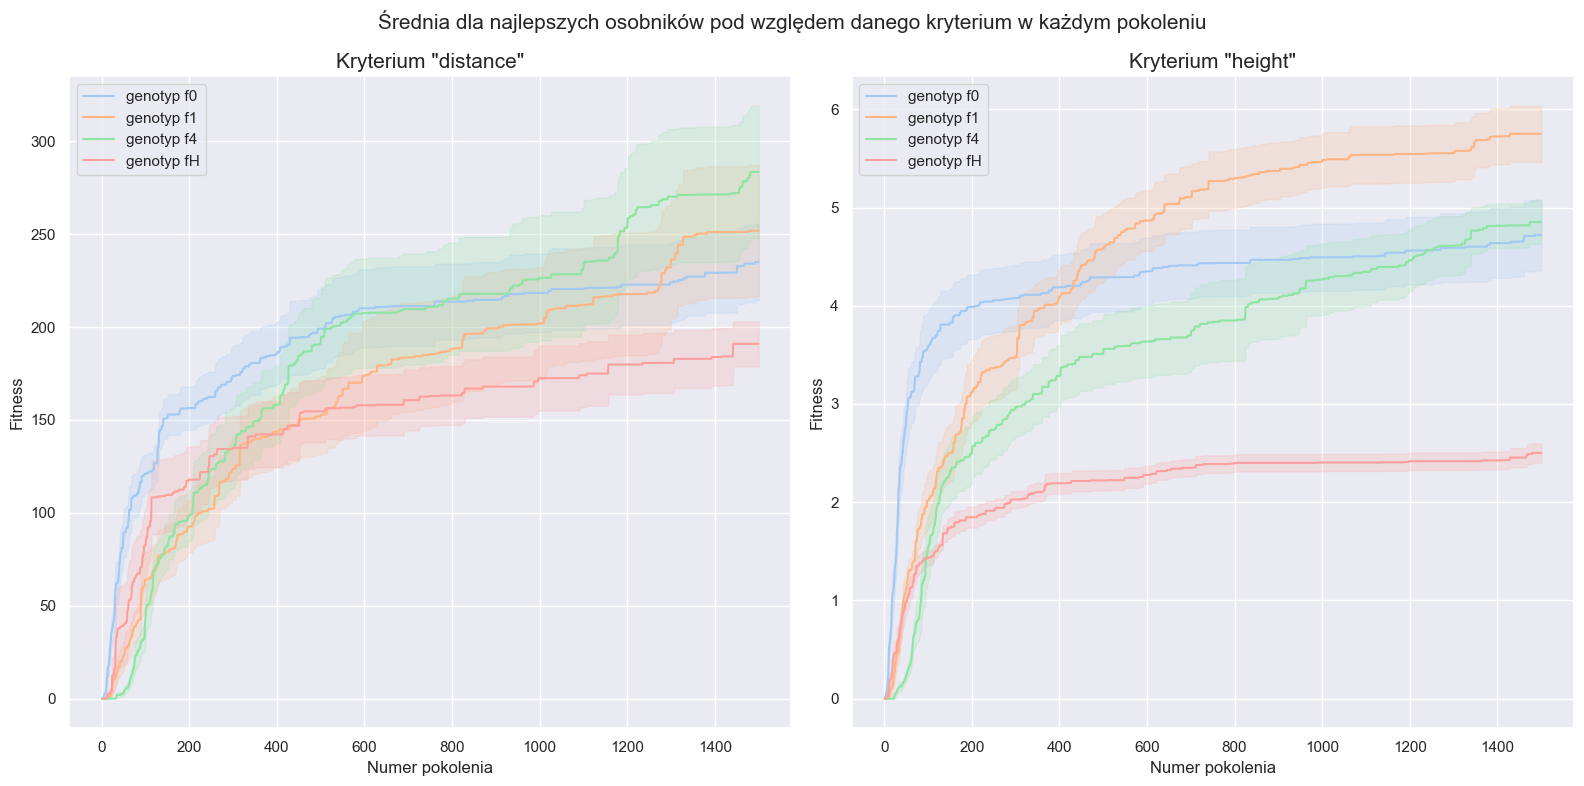

In [40]:
palette = sns.color_palette("pastel", len(G_VALUES))
color_map = dict(zip(G_VALUES, palette)) 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes = axes.flatten()

base_path = Path("../framspy/lab7")

# Distance
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    data = {"distance": [], "iteration": [], "generation": []}
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_distance = 0
                for line in file:
                    if line.startswith("0:"):
                        best_distance = max(best_distance, float(line.split(':')[1]))
                data["distance"].append(best_distance)
                data["iteration"].append(int(iteration_path.name))
                data["generation"].append(int(generation_file.stem))
    df = pd.DataFrame(data)
    sns.lineplot(df, x="generation", y="distance", color=color_map[g_value], label=f"genotyp f{g_value}", errorbar=("sd", 0.3), ax=axes[0])
axes[0].set_title("Kryterium \"distance\"", fontsize=15)
axes[0].set_ylabel("Fitness")
axes[0].set_xlabel("Numer pokolenia")

# Height
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    data = {"height": [], "iteration": [], "generation": []}
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                best_height = 0
                for line in file:
                    if line.startswith("1:"):
                        best_height = max(best_height, float(line.split(':')[1]))
                data["height"].append(best_height)
                data["iteration"].append(int(iteration_path.name))
                data["generation"].append(int(generation_file.stem))
    df = pd.DataFrame(data)
    sns.lineplot(df, x="generation", y="height", color=color_map[g_value], label=f"genotyp f{g_value}", errorbar=("sd", 0.3), ax=axes[1])
axes[1].set_title("Kryterium \"height\"", fontsize=15)
axes[1].set_ylabel("Fitness")
axes[1].set_xlabel("Numer pokolenia")

plt.suptitle("Średnia dla najlepszych osobników pod względem danego kryterium w każdym pokoleniu", fontsize=15)
plt.tight_layout()
plt.savefig('./plots/2-przebiegi-agregacja.png')
plt.show()

# Boxplot

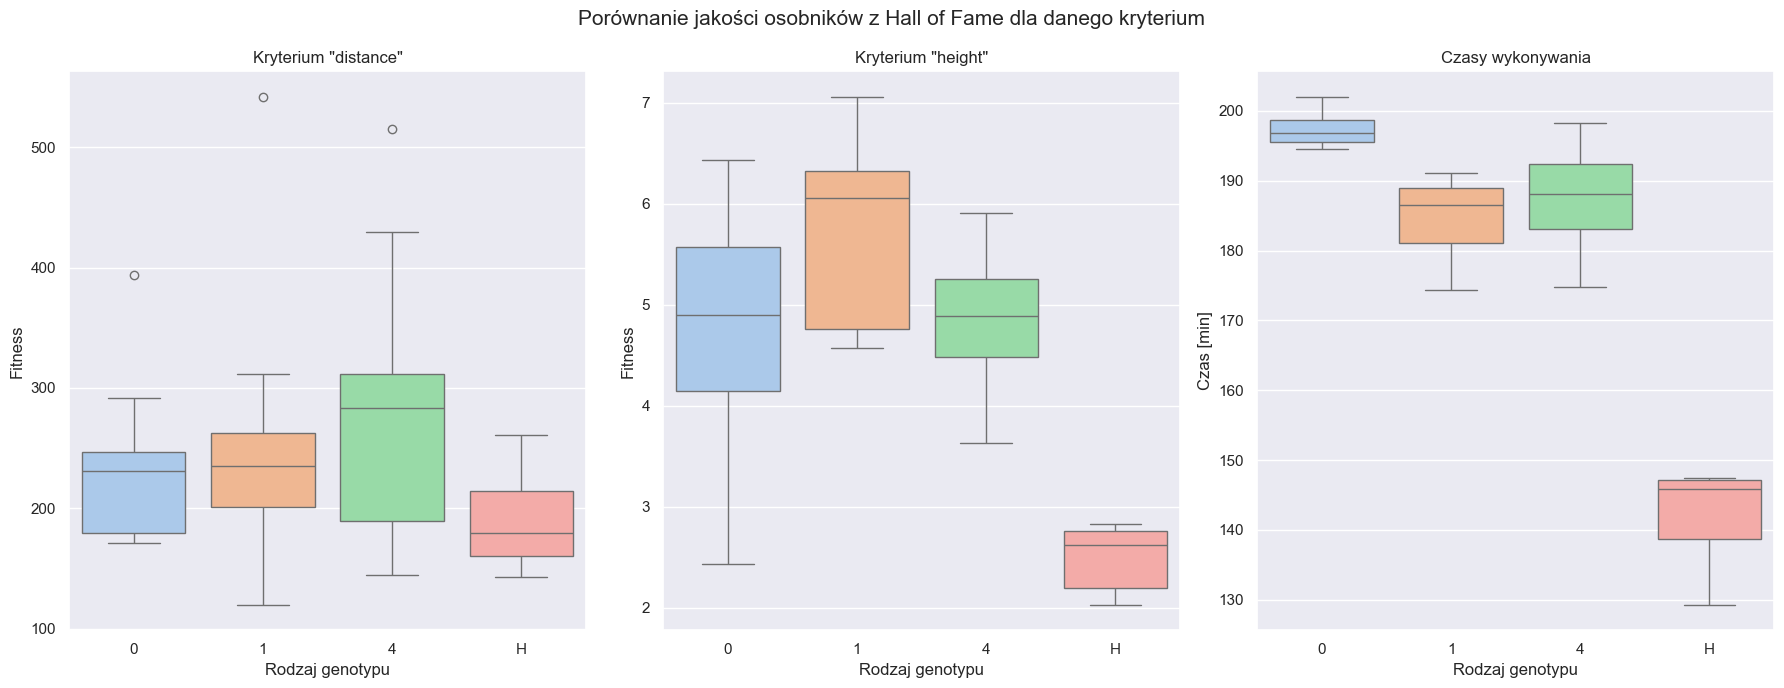

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
axes = axes.flatten()

base_path = Path("../framspy/lab7")

# Distance
data = {g_value: [] for g_value in G_VALUES}
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        best_distance = 0
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        best_distance = max(best_distance, float(line.split(':')[1]))
        data[g_value].append(best_distance)

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[0])
axes[0].set_title("Kryterium \"distance\"")
axes[0].set_xlabel("Rodzaj genotypu")
axes[0].set_ylabel("Fitness")

# Height
data = {g_value: [] for g_value in G_VALUES}
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}/genotypes"
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        best_height = 0
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("1:"):
                        best_height = max(best_height, float(line.split(':')[1]))
        data[g_value].append(best_height)

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[1])
axes[1].set_title("Kryterium \"height\"")
axes[1].set_xlabel("Rodzaj genotypu")
axes[1].set_ylabel("Fitness")


# Czas wykonywania
data = {g_value: [] for g_value in G_VALUES}
for g_value in G_VALUES:
    g_path = base_path / f"f{g_value}"
    df = pd.DataFrame()
    for i, time_file in enumerate(g_path.glob("*.txt")):
        if i == 0:
            df = pd.read_csv(time_file)
        else:
            df = pd.merge(df, pd.read_csv(time_file), on='N', suffixes=('', f'_{time_file.stem}'))

    data[g_value] = (df.set_index('N').sum(axis=1) / 60).to_list()

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[2])
axes[2].set_title("Czasy wykonywania")
axes[2].set_xlabel("Rodzaj genotypu")
axes[2].set_ylabel("Czas [min]")

plt.suptitle("Porównanie jakości osobników z Hall of Fame dla danego kryterium", fontsize=15)
plt.tight_layout()
plt.savefig('./plots/3-boxplot.png')
plt.show()

# Analiza frontów Pareto

## Wszystkie osobniki

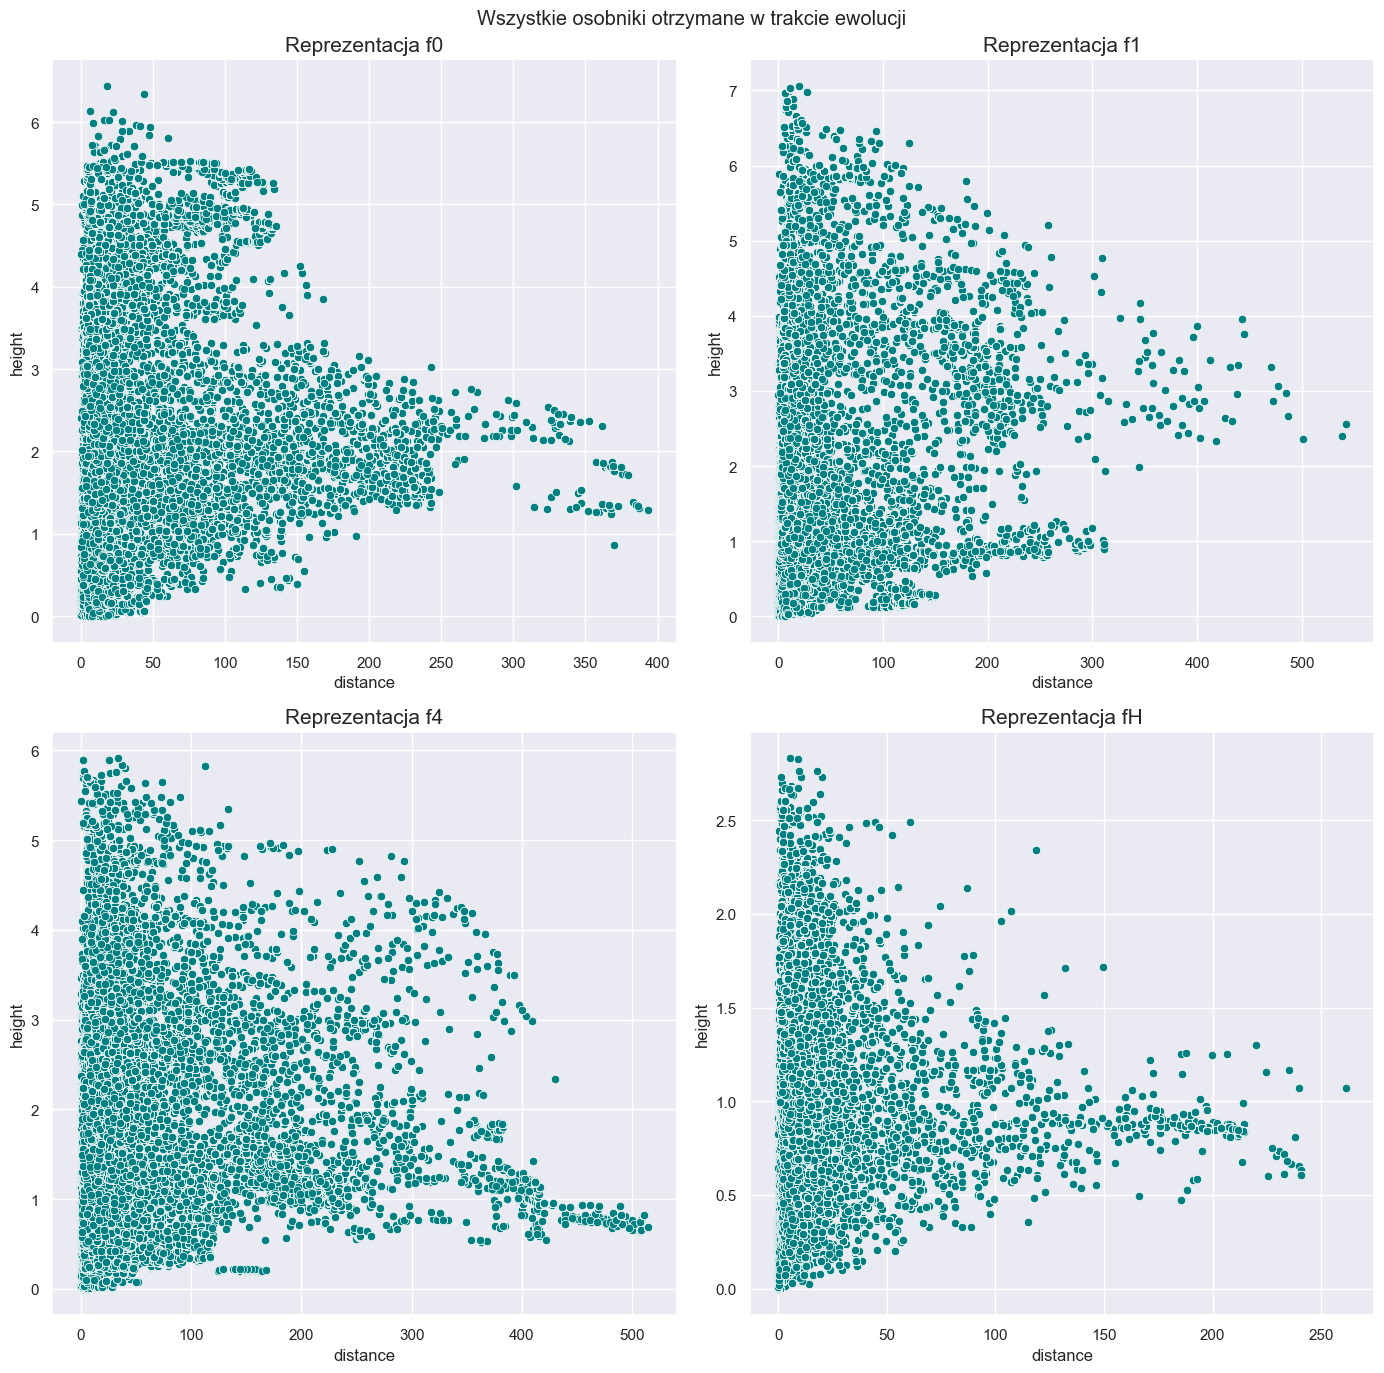

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

base_path = Path("../framspy/lab7")
for i, g_value in enumerate(G_VALUES):
    g_path = base_path / f"f{g_value}/genotypes"
    data = {"distance": [], "height": []}
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        data["distance"].append(float(line.split(':')[1]))     
                    if line.startswith("1:"):
                        data["height"].append(float(line.split(':')[1]))

    df = pd.DataFrame(data)
    sns.scatterplot(df, x="distance", y="height", ax=axes[i], color="teal")
    axes[i].set_title(f"Reprezentacja f{g_value}", fontsize=15)

plt.suptitle("Wszystkie osobniki otrzymane w trakcie ewolucji")
plt.tight_layout()
plt.savefig("./plots/4-pareto-all.png")
plt.show()

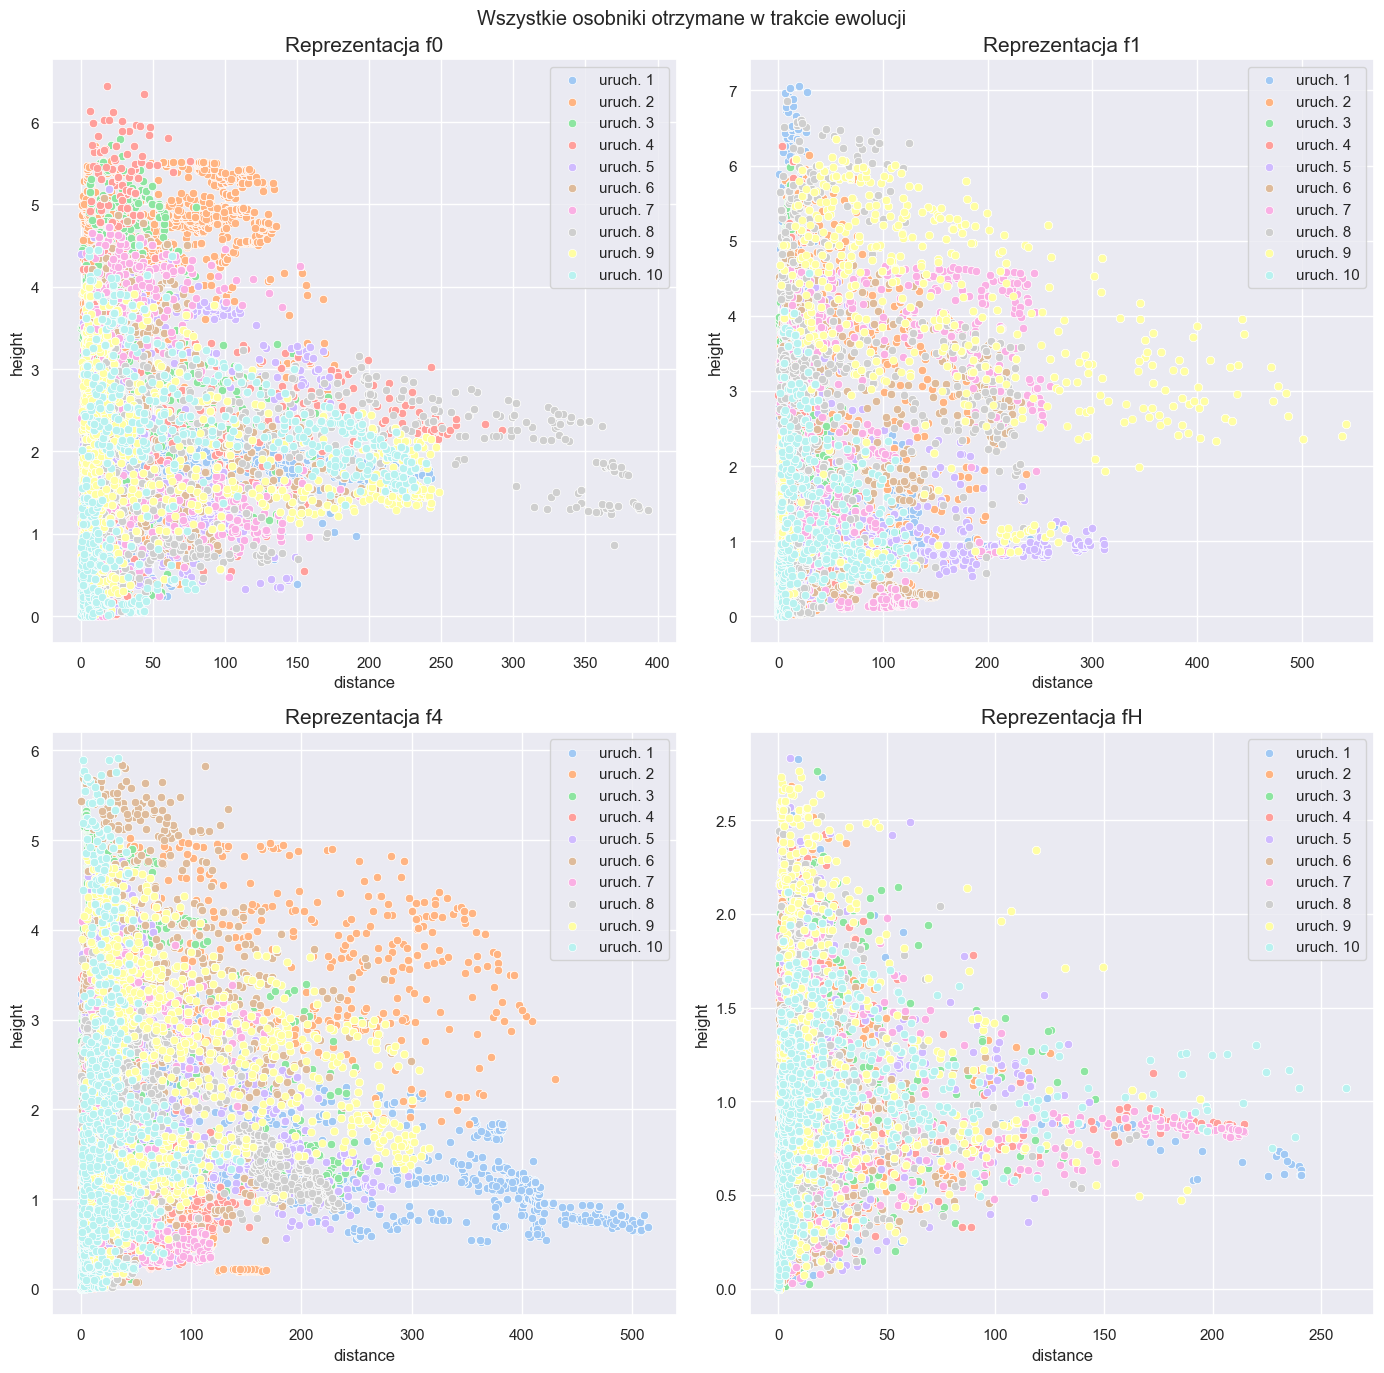

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

base_path = Path("../framspy/lab7")
for i, g_value in enumerate(G_VALUES):
    g_path = base_path / f"f{g_value}/genotypes"
    palette = sns.color_palette("pastel", len(list((d for d in g_path.iterdir() if d.is_dir()))))
    for j, iteration_path in enumerate(sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name))):
        data = {"distance": [], "height": []}
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        data["distance"].append(float(line.split(':')[1]))     
                    if line.startswith("1:"):
                        data["height"].append(float(line.split(':')[1]))

        df = pd.DataFrame(data)
        sns.scatterplot(df, x="distance", y="height", ax=axes[i], color=palette[j], label=f"uruch. {j+1}")
        axes[i].set_title(f"Reprezentacja f{g_value}", fontsize=15)

plt.suptitle("Wszystkie osobniki otrzymane w trakcie ewolucji")
plt.tight_layout()
plt.savefig("./plots/5-pareto-all-colored.png")
plt.show()

## Animacja - przebieg ewolucji z historia

Processing frame: 1500/1500


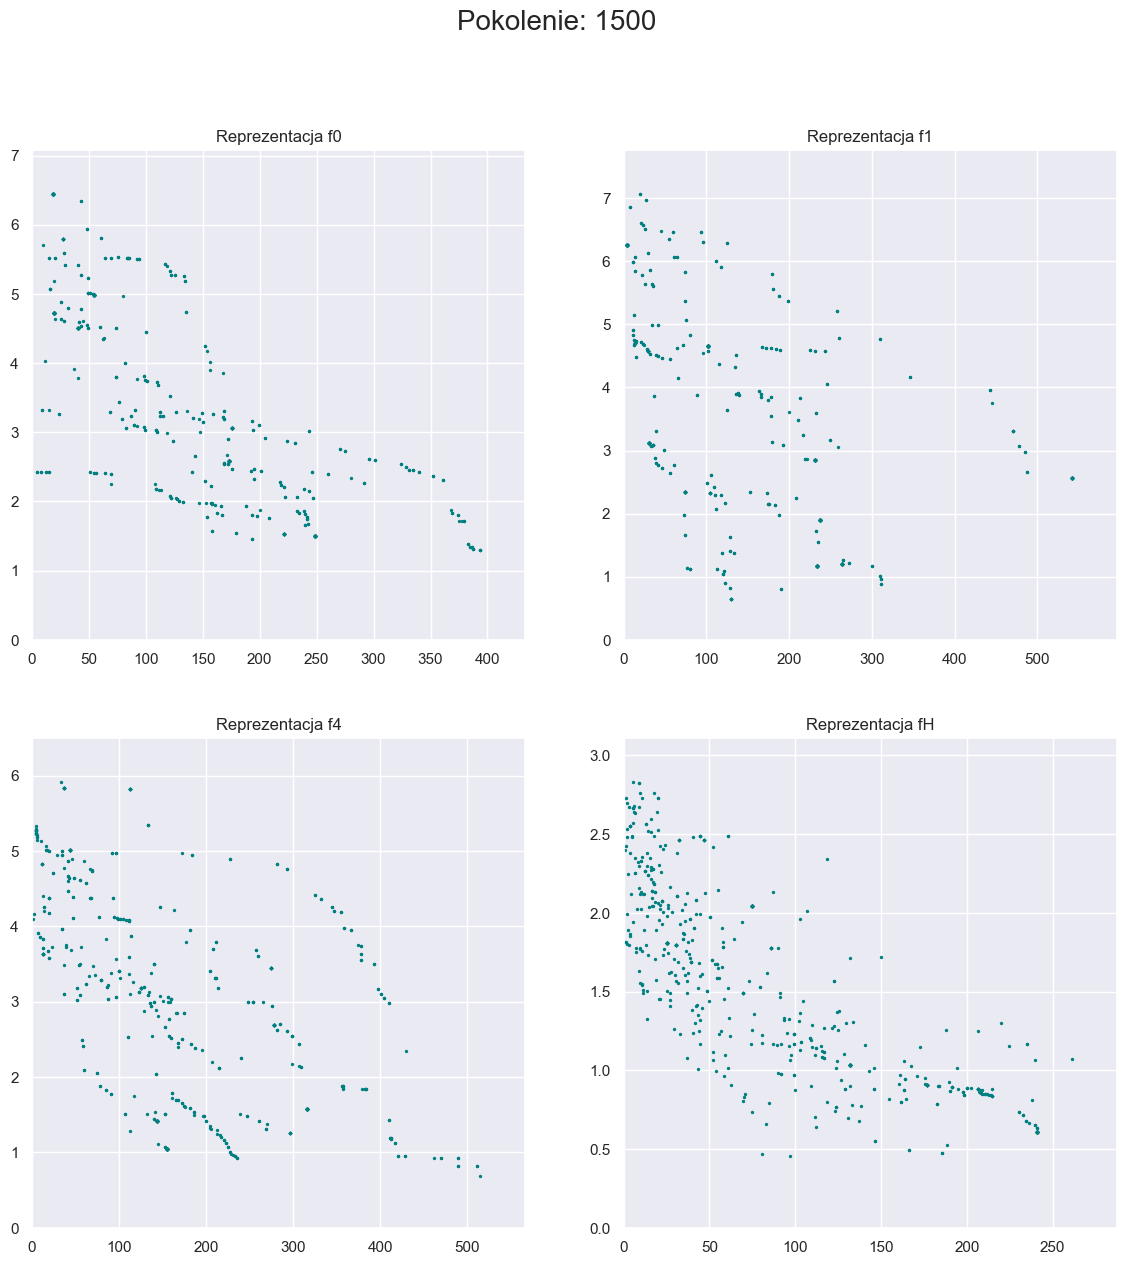

In [30]:
sns.set_style("darkgrid")

base_path = Path("../framspy/lab7")
# Function to read data for a given frame
def read_frame_data(frame):
    data = {g_value: {"distance": [], "height": []} for g_value in G_VALUES}    
    for i, g_value in enumerate(G_VALUES):
        g_path = base_path / f"f{g_value}/genotypes"
        for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
            generation_file = iteration_path / f"{frame}.gen"        
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        data[g_value]["distance"].append(float(line.split(':')[1]))     
                    if line.startswith("1:"):
                        data[g_value]["height"].append(float(line.split(':')[1]))
    return data
    
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

def get_max_value(genotype, criterion):
    g_path = base_path / f"f{genotype}/genotypes"
    best = 0
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):          
            with generation_file.open() as file:
                for line in file:
                    if line.startswith(f"{criterion}:"):
                        best = max(best, float(line.split(':')[1]))
    return best

plots = {}
for i, g_value in enumerate(G_VALUES):
    axes[i].set_xlim(0, get_max_value(g_value, 0)*1.1)
    axes[i].set_ylim(0, get_max_value(g_value, 1)*1.1)
    axes[i].set_title(f"Reprezentacja f{g_value}")
    plots[g_value] = axes[i].scatter([], [], s=2, color='teal')

# Update function for animation
def update(frame):
    clear_output(wait=True)
    print(f"Processing frame: {frame + 1}/{frames}") 
    fig.suptitle(f"Pokolenie: {frame + 1}", fontsize=20)
    data = read_frame_data(frame + 1)
    for i, g_value in enumerate(G_VALUES):
        df = pd.DataFrame(data[g_value])
        plots[g_value].set_offsets(df[['distance', 'height']].values)
    return [plots[g_value] for g_value in G_VALUES]

# Create the animation
frame_dir = base_path / f"f{G_VALUES[0]}/genotypes/1"
frames = len(list(frame_dir.glob("*.gen")))

ani = FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

# Show the animation
writer = FFMpegWriter(fps=10, metadata=dict(artist="Filip Marciniak"), bitrate=1800)
ani.save("./plots/6-animation-all.mp4", writer=writer)
plt.show()

Processing frame: 1500/1500


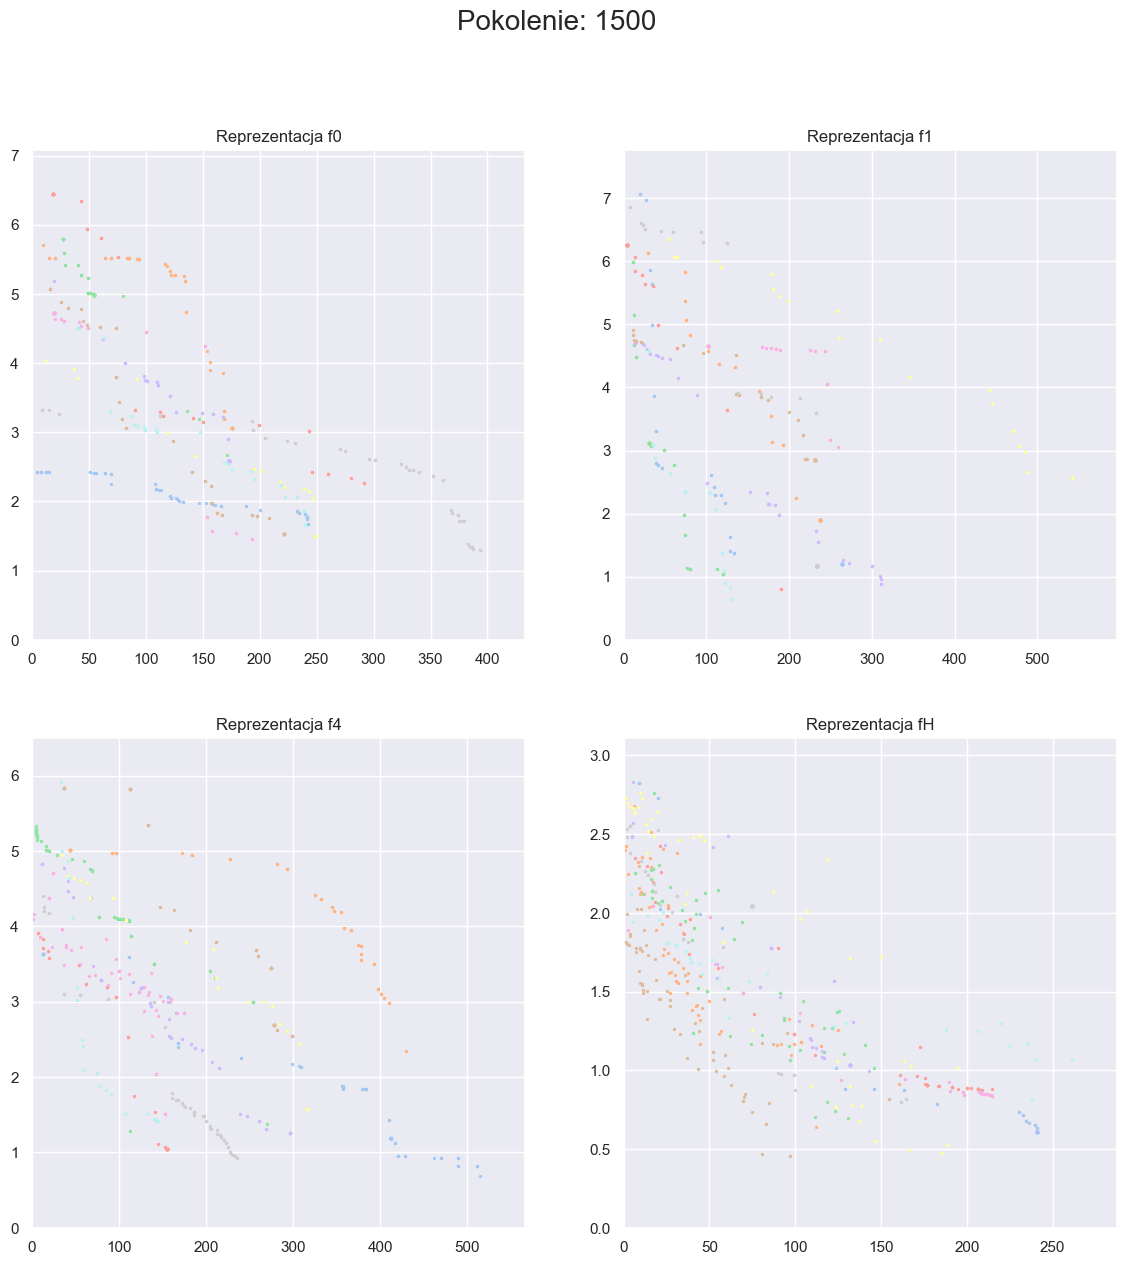

In [31]:
sns.set_style("darkgrid")

base_path = Path("../framspy/lab7")
# Function to read data for a given frame, with colors for iteration paths
def read_frame_data(frame):
    data = {g_value: {"distance": [], "height": [], "color": []} for g_value in G_VALUES}
    for i, g_value in enumerate(G_VALUES):
        g_path = base_path / f"f{g_value}/genotypes"
        iteration_paths = sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name))
        palette = sns.color_palette("pastel", len(iteration_paths))  # Get pastel colors for all iteration paths
        
        for j, iteration_path in enumerate(iteration_paths):
            generation_file = iteration_path / f"{frame}.gen"
            with generation_file.open() as file:
                for line in file:
                    if line.startswith("0:"):
                        data[g_value]["distance"].append(float(line.split(':')[1]))
                        data[g_value]["color"].append(palette[j])  # Assign color for this iteration path
                    if line.startswith("1:"):
                        data[g_value]["height"].append(float(line.split(':')[1]))
    return data

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

def get_max_value(genotype, criterion):
    g_path = base_path / f"f{genotype}/genotypes"
    best = 0
    for iteration_path in sorted((d for d in g_path.iterdir() if d.is_dir()), key=lambda x: int(x.name)):
        for generation_file in sorted(iteration_path.iterdir(), key=lambda x: int(x.stem)):
            with generation_file.open() as file:
                for line in file:
                    if line.startswith(f"{criterion}:"):
                        best = max(best, float(line.split(':')[1]))
    return best

plots = {}
scatter_plots = {g_value: [] for g_value in G_VALUES}

# Initialize the scatter plots
for i, g_value in enumerate(G_VALUES):
    axes[i].set_xlim(0, get_max_value(g_value, 0) * 1.1)
    axes[i].set_ylim(0, get_max_value(g_value, 1) * 1.1)
    axes[i].set_title(f"Reprezentacja f{g_value}")
    plots[g_value] = axes[i]

# Update function for animation
def update(frame):
    frame = (frame + 1) * SKIP
    clear_output(wait=True)
    print(f"Processing frame: {frame}/{frames*SKIP}") 
    fig.suptitle(f"Pokolenie: {frame}", fontsize=20)
    
    # Read the data for the current frame
    data = read_frame_data(frame)
    
    # Update scatter plots for each g_value
    for i, g_value in enumerate(G_VALUES):
        # Clear previous scatter plots
        for scatter in scatter_plots[g_value]:
            scatter.remove()
        scatter_plots[g_value] = []
        # Plot new points, with colors
        for d, h, c in zip(data[g_value]["distance"], data[g_value]["height"], data[g_value]["color"]): 
            scatter = plots[g_value].scatter(d, h, s=2, color=c)
            scatter_plots[g_value].append(scatter)               
    
    return [scatter for g_value in G_VALUES for scatter in scatter_plots[g_value]]

# Create the animation
SKIP = 20
frame_dir = base_path / f"f{G_VALUES[0]}/genotypes/1"
frames = len(list(frame_dir.glob("*.gen"))) // SKIP

ani = FuncAnimation(fig, update, frames=frames, interval=100, blit=True)

# Save the animation as MP4
writer = FFMpegWriter(fps=10, metadata=dict(artist="Filip Marciniak"), bitrate=1800)
ani.save("./plots/7-animation-all-colored-nondf.mp4", writer=writer)

plt.show()